**Feature Selection and Decision Tree**

---

Dr: Nour El-Madany

TA: Abdelrahman Sakr





In [1]:
# Import essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()

# Create features (X) and target (y)
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
# Display basic info
print("Shape of dataset:", x.shape)
x.head()


Shape of dataset: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [3]:
x.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [4]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold
# threshold=0.01 means we remove features with variance < 0.01
selector = VarianceThreshold(threshold=0.01)

# Fit the selector on data and transform it
x_reduced = selector.fit_transform(x)

print("Original shape:", x.shape)
print("Reduced shape:", x_reduced.shape)


Original shape: (569, 30)
Reduced shape: (569, 14)


In [5]:
x_reduced=pd.DataFrame(x_reduced, columns=selector.get_feature_names_out(x.columns))
x_reduced.head()

,mean radius,mean texture,mean perimeter,mean area,radius error,texture error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity
0,17.99,10.38,122.80,1001.0,1.0950,0.9053,8.589,153.40,25.38,17.33,184.60,2019.0,0.6656,0.7119
1,20.57,17.77,132.90,1326.0,0.5435,0.7339,3.398,74.08,24.99,23.41,158.80,1956.0,0.1866,0.2416
2,19.69,21.25,130.00,1203.0,0.7456,0.7869,4.585,94.03,23.57,25.53,152.50,1709.0,0.4245,0.4504
3,11.42,20.38,77.58,386.1,0.4956,1.1560,3.445,27.23,14.91,26.50,98.87,567.7,0.8663,0.6869
4,20.29,14.34,135.10,1297.0,0.7572,0.7813,5.438,94.44,22.54,16.67,152.20,1575.0,0.2050,0.4000


In [6]:
x_reduced.shape

(569, 14)

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest
# f_classif = ANOVA F-test used for classification problems
# k=10 means we will keep the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)

# Fit and transform
X_new = selector.fit_transform(x, y)

# Get the selected feature names
selected_features = x.columns[selector.get_support()]
print("Selected top 10 features:\n", selected_features.tolist())


Selected top 10 features:
 ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


In [8]:
# Create a new DataFrame with only the selected features
x_selected = x[selected_features]
x_selected

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points
0,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.7119,0.2654
1,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.2416,0.1860
2,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.4504,0.2430
3,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.6869,0.2575
4,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.4107,0.2216
565,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.3215,0.1628
566,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.3403,0.1418
567,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.9387,0.2650


In [9]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information between each feature and target
mi_scores = mutual_info_classif(x, y)

# Convert to pandas series for easier viewing
mi_series = pd.Series(mi_scores, index=x.columns).sort_values(ascending=False)

# Display top features
print("Top 10 features by Mutual Information:\n", mi_series.head(10))


Top 10 features by Mutual Information:
 worst perimeter         0.473902
worst area              0.464118
worst radius            0.455635
mean concave points     0.439695
worst concave points    0.437688
mean perimeter          0.402295
mean concavity          0.375089
mean radius             0.366848
mean area               0.357014
area error              0.338805
dtype: float64


In [10]:
final=x_selected # x_selected is the dataframe that carries the features selected by SelectKBest
final

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points
0,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.7119,0.2654
1,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.2416,0.1860
2,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.4504,0.2430
3,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.6869,0.2575
4,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.4107,0.2216
565,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.3215,0.1628
566,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.3403,0.1418
567,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.9387,0.2650


In [11]:
x_train,x_test,y_train,y_test=train_test_split(final,y,test_size=0.3,random_state=42)

In [12]:
x_train.shape

(398, 10)

In [13]:
feature_names = x_train.columns.tolist() # Extracts feature names
class_names = y_train.unique().astype(str) # Extracts class labels as strings

In [43]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=4,
    random_state=42
)

In [44]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

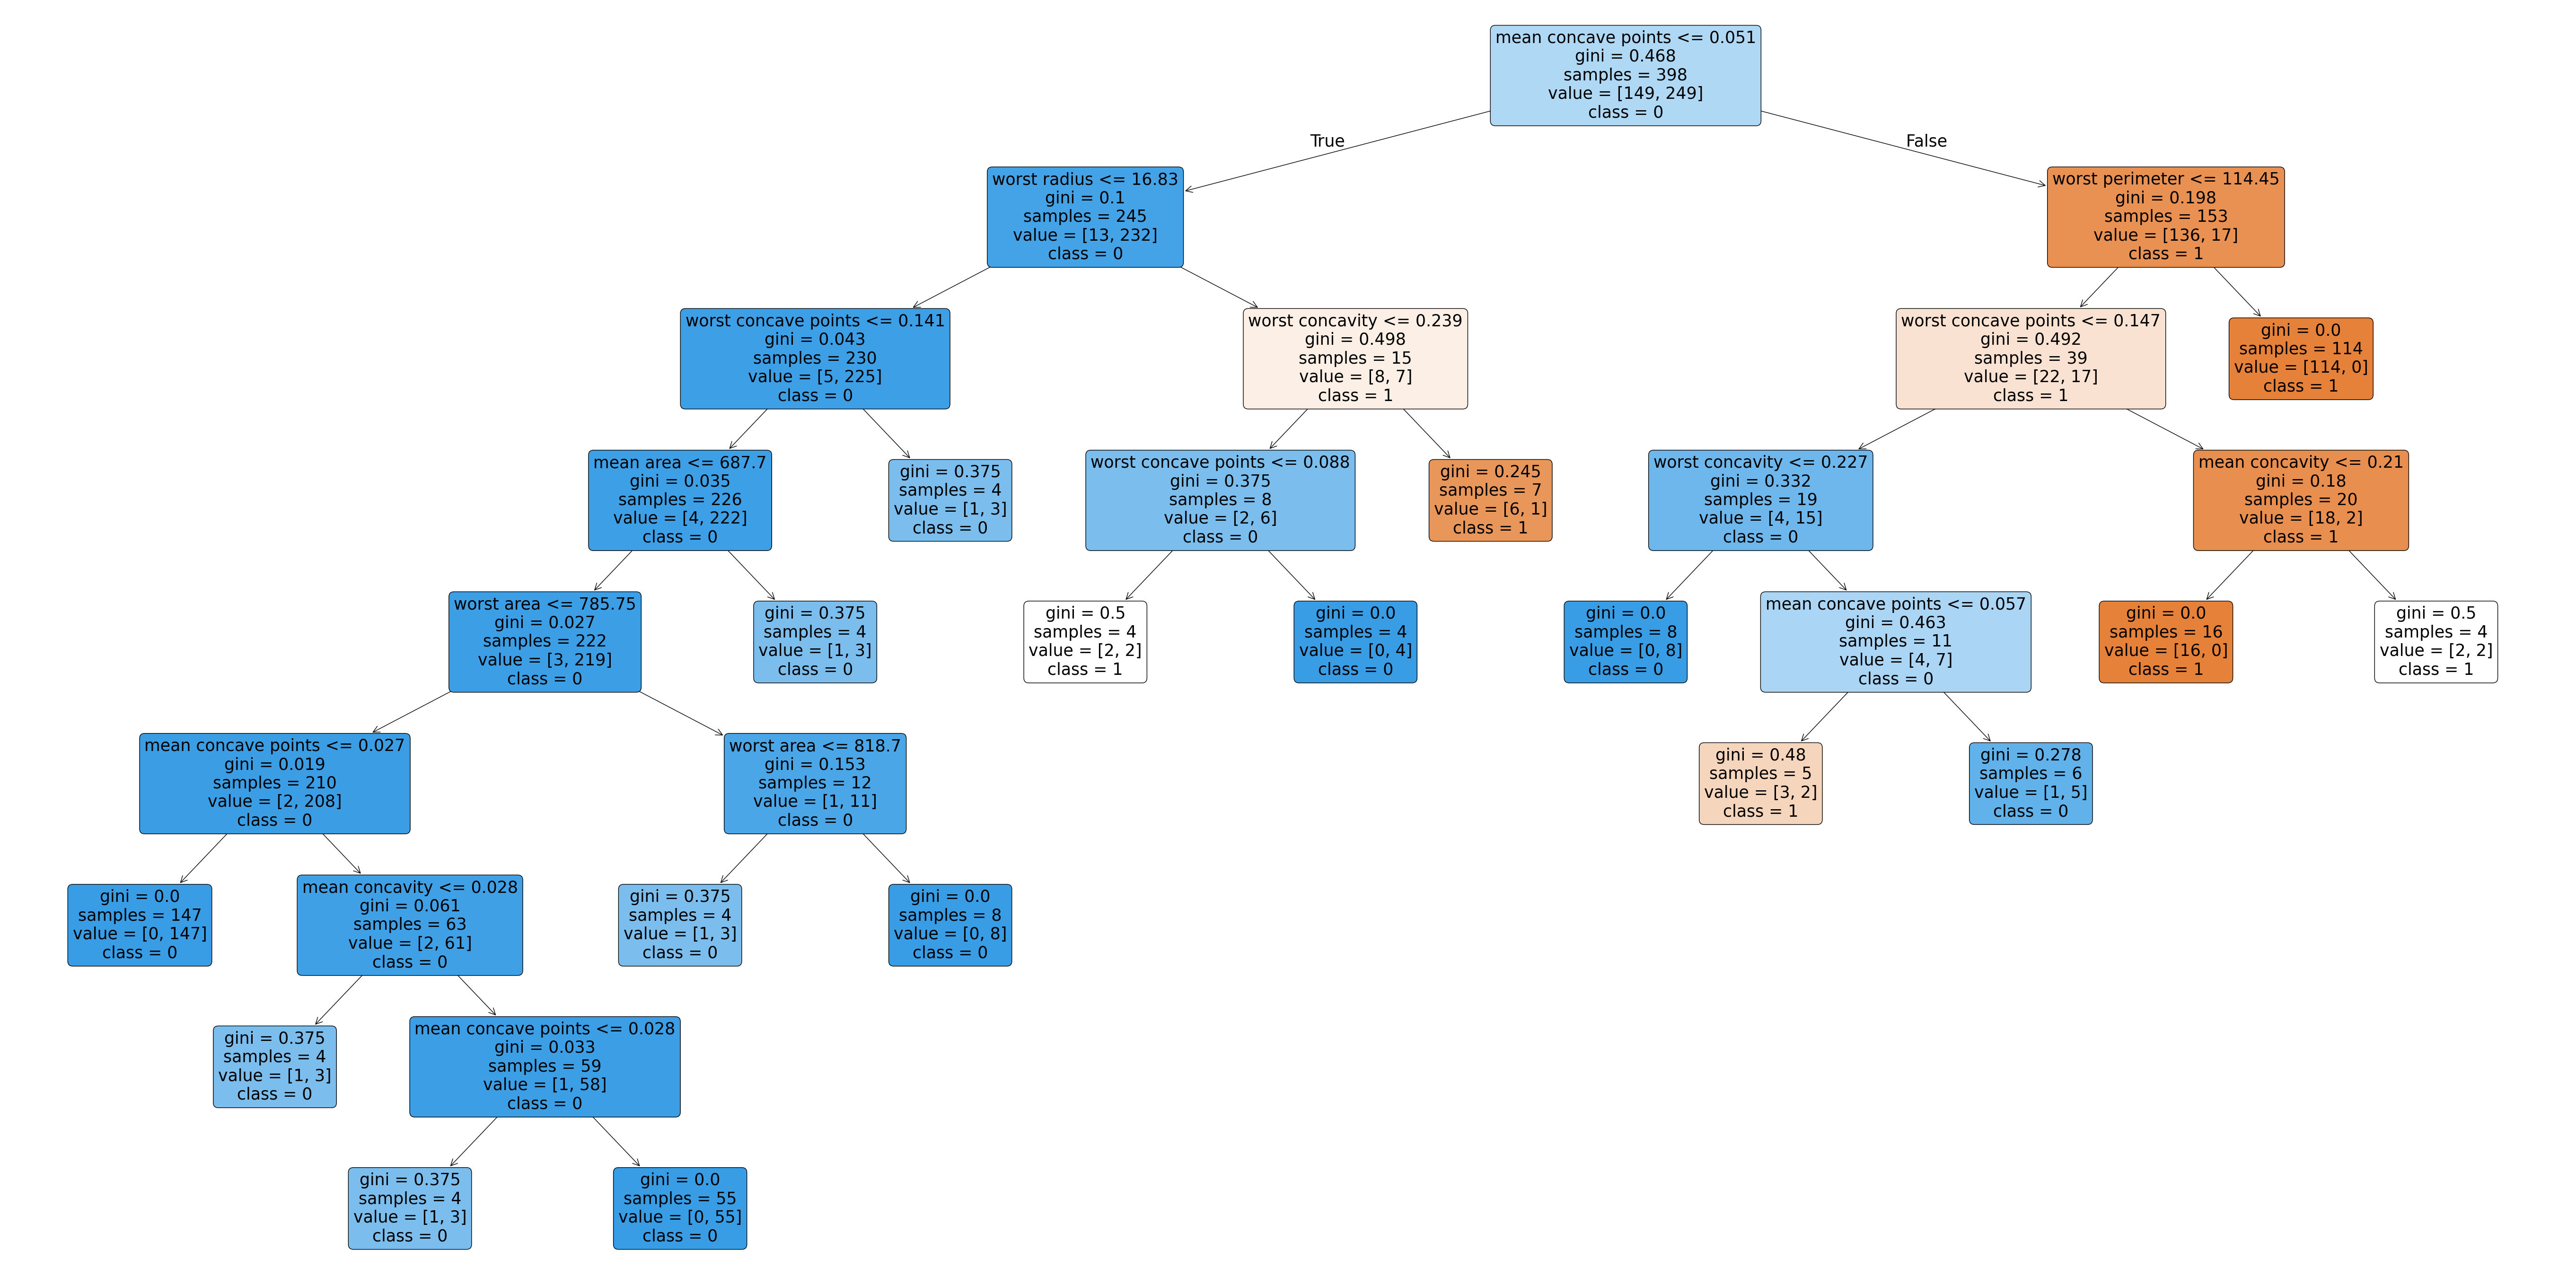

In [45]:
from sklearn import tree
plt.figure(figsize=(70, 35)) #figsize=(width, height)
tree.plot_tree(model,

feature_names=feature_names, #columns name in the input ,
class_names=class_names, #the unique values in the output as a string ,
filled=True, #Colors the nodes based on the predicted class
rounded=True )#Provides a cleaner, more visually appealing plot)

plt.show()

In [46]:
tree_y_pre=model.predict(x_test)

In [47]:

training_accuracy=accuracy_score(y_train,model.predict(x_train))
test_accuracy=accuracy_score(y_test,tree_y_pre)
print("training accuracy score:", training_accuracy*100 ," %")
print("test accuracy score:", test_accuracy*100 ," %")

training accuracy score: 96.73366834170855  %
test accuracy score: 94.73684210526315  %


In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, final, y, cv=5)
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.919174041297935


Now Let's see between our Decision Tree Model without feature selection

In [48]:
data2 = load_breast_cancer()

# Create features (X) and target (y)
w_x = pd.DataFrame(data2.data, columns=data2.feature_names)
w_y= pd.Series(data2.target, name='target')
# Display basic info
print("Shape of dataset:", w_x.shape)
w_x.head()

Shape of dataset: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
x_train2,x_test2,y_train2,y_test2=train_test_split(w_x,w_y,test_size=0.3,random_state=42)

In [50]:
model2=DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=4,
    random_state=42
)
model2.fit(x_train2,y_train2)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

In [51]:
y_predict=model2.predict(x_test2)
train_accuracy2=accuracy_score(y_train2,model2.predict(x_train2))
test_accuracy2=accuracy_score(y_test2,y_predict)
print("training accuracy score",train_accuracy2*100,"%")
print("test accuracy score:", test_accuracy2*100 ," %")

training accuracy score 98.24120603015075 %
test accuracy score: 95.90643274853801  %


In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, x, y, cv=5)
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9138487812451481
